In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import env
user = env.user
host = env.host
password = env.password

import os
os.path.exists('env.py')

def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'

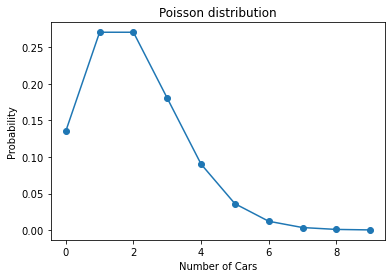

In [74]:
#1.  A bank found that the average number of cars waiting during the 
# noon hour at a drive-up window follows a Poisson distribution 
# with a mean of 2 cars. Make a chart of this distribution and 
# answer these questions concerning the probability of cars 
# waiting at the drive-up window.

k = np.arange(0, 10)
pmf = stats.poisson.pmf(k, mu=2)
pmf = np.round(pmf, 5)
plt.plot(k, pmf, marker='o')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.title('Poisson distribution')
plt.show()

cars = stats.poisson(2)

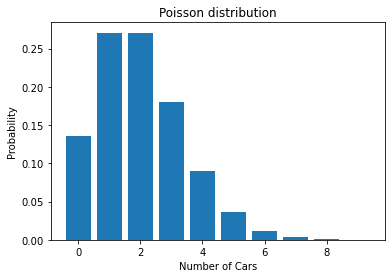

In [31]:
plt.bar(k, pmf)
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.title('Poisson distribution')
plt.show()


In [80]:
# What is the probability that no cars drive up in the noon hour?

print(cars.pmf(0))

# What is the probability that 3 or more cars come through the drive through?

print(cars.sf(2))

# How likely is it that the drive through gets at least 1 car?

print(cars.sf(0))


0.1353352832366127
0.32332358381693654
0.8646647167633873


In [62]:
# 2. Grades of State University graduates are normally distributed with a 
# mean of 3.0 and a standard deviation of .3. Calculate the following:


# What grade point average is required to be in the top 5% 
# of the graduating class?

top_5 = stats.norm(3, .3)
top_5.isf(.05)

3.4934560880854417

In [63]:
# What GPA constitutes the bottom 15% of the class?

bottom_15 = stats.norm(3, .3)
bottom_15.ppf(.15)


2.689069983151863

In [167]:
# An eccentric alumnus left scholarship money for students in the third 
# decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for 
# this scholarship?

third_decile = stats.norm(3, .3)
print(third_decile.ppf([.20,.30]))
# range of (2.74..., 2.84...)
# Yes they would receive the scholorship



[2.74751363 2.84267985]


In [99]:
# If I have a GPA of 3.5, what percentile am I in?

student = stats.norm(3, .3)
student.cdf(3.49)
# 95th percentile


0.9488005450828922

In [100]:
# 3. A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

visitors = 4326
avg_click_through = .02

day = stats.binom(visitors, avg_click_through)
day.sf(96)


0.13975823631416448

In [164]:
# 4. You are working on some statistics homework consisting of 100 
# questions where all of the answers are a probability rounded to the 
# hundreths place. Looking to save time, you put down random 
# probabilities as the answer to each question.

questions = 60
chance = 1/100


# What is the probability that at least one of your first 
# 60 answers is correct?

correct_ans = stats.binom(questions, chance)
correct_ans.sf(0)

0.45284335760923855

In [158]:
# 5. The codeup staff tends to get upset when the student break area is 
# not cleaned up. Suppose that there's a 3% chance that any one student 
# cleans the break area when they visit it, and, on any given day, 
# about 90% of the 3 active cohorts of 22 students visit the break area.
# How likely is it that the break area gets cleaned up each day? 

cleaned = .03
students = 22 * 3 * .9
clean_room = stats.binom(students, cleaned)
clean_room.pmf(1)


0.300868680133005

In [160]:
# How likely is it that it goes two days without getting cleaned up? 

unclean_room_2 = stats.binom(students * 2, cleaned)
unclean_room_2.cdf(0)

0.026821436301629087

In [161]:
# All week?

unclean_room_5 = stats.binom(students * 5, cleaned)
unclean_room_5.cdf(0)

0.00011781621791055144

In [142]:
# 6. You want to get lunch at La Panaderia, but notice that the line 
# is usually very long at lunchtime. After several weeks of careful 
# observation, you notice that the average number of people in line when 
# your lunch break starts is normally distributed with a mean of 15 and 
# standard deviation of 3. If it takes 2 minutes for each person to order,
# and 10 minutes from ordering to getting your food, what is the 
# likelihood that you have at least 15 minutes left to eat your food 
# before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time 
# to and from La Panaderia.

# 60min - 15min = 45min - 10min = 35min/2min = 17.5 people
# round down because you can't have half a person

people = stats.norm(15, 3)
people.cdf(17)

0.7475074624530771

In [148]:
# 7. Connect to the employees database and find the average salary of 
# current employees, along with the standard deviation. 
# For the following questions, calculate the answer based on modeling 
# the employees salaries with a normal distribution defined by the 
# calculated mean and standard deviation then compare this answer to 
# the actual values present in the salaries dataset.

url_emp = get_db_url('employees')
df = pd.read_sql(
'SELECT salary FROM employees JOIN salaries USING (emp_no) WHERE to_date > NOW();', url_emp)

df.mean()

salary    72012.235857
dtype: float64

In [149]:
df.std()

salary    17309.99538
dtype: float64

In [151]:
# What percent of employees earn less than 60,000?

salary = stats.norm(72012.235857, 17309.99538)
salary.cdf(60_000.01)


0.2438576059564661

In [153]:
# What percent of employees earn more than 95,000?

salary.sf(95_000)

0.09208819199191742

In [163]:
# What percent of employees earn between 65,000 and 80,000?

between = salary.cdf([65_000, 80_000])
between[1] - between[0]

0.33506056854908584

In [157]:
# What do the top 5% of employees make?

salary.isf(.05)

100484.64454030624